In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [ ]:
# Define the activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [ ]:
# Define the derivative of the activation function
def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

In [ ]:
# Initialize parameters
def initialize_parameters(input_size, hidden_size, output_size):
    W1 = np.random.randn(input_size, hidden_size)
    b1 = np.zeros((1, hidden_size))
    W2 = np.random.randn(hidden_size, output_size)
    b2 = np.zeros((1, output_size))
    return W1, b1, W2, b2

In [ ]:
# Feedforward process
def feedforward(X, W1, b1, W2, b2):
    z1 = np.dot(X, W1) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(a1, W2) + b2
    a2 = sigmoid(z2)
    return a1, a2

In [ ]:
# Backpropagation
def backpropagation(X, y, W1, b1, W2, b2, a1, a2):
    m = X.shape[0]  # examples no
    dz2 = a2 - y
    dW2 = np.dot(a1.T, dz2) / m
    db2 = np.sum(dz2, axis=0, keepdims=True) / m
    dz1 = np.dot(dz2, W2.T) * sigmoid_derivative(a1)
    dW1 = np.dot(X.T, dz1) / m
    db1 = np.sum(dz1, axis=0, keepdims=True) / m
    return dW1, db1, dW2, db2

In [ ]:
# Update parameters
def update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate):
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    return W1, b1, W2, b2

In [ ]:
# Train the neural network
def train_neural_network(X_train, y_train, input_size, hidden_size, output_size, learning_rate, epochs):
    W1, b1, W2, b2 = initialize_parameters(input_size, hidden_size, output_size)
    for epoch in range(epochs):
        a1, a2 = feedforward(X_train, W1, b1, W2, b2)
        dW1, db1, dW2, db2 = backpropagation(X_train, y_train, W1, b1, W2, b2, a1, a2)
        W1, b1, W2, b2 = update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate)

        if (epoch + 1) % 100 == 0:  # Print accuracy every 100 epochs
            _, a2_test = feedforward(X_test, W1, b1, W2, b2)
            y_pred_labels = np.argmax(a2_test, axis=1)
            accuracy = accuracy_score(y_test.astype(int), y_pred_labels)
            print(f"Epoch {epoch+1}/{epochs} - Accuracy: {accuracy*100:.2f}%")

    return W1, b1, W2, b2

In [ ]:
def test_neural_network(X_test, y_test, W1, b1, W2, b2):
    _, a2 = feedforward(X_test, W1, b1, W2, b2)
    y_pred_labels = np.argmax(a2, axis=1)
    accuracy = accuracy_score(y_test.astype(int), y_pred_labels)
    confusion_mat = confusion_matrix(y_test.astype(int), y_pred_labels)
    return accuracy, confusion_mat

In [ ]:
# Load MNIST dataset and preprocess
mnist = fetch_openml('mnist_784')
X = mnist.data
y = mnist.target

sample_size = 10000
X_sample, _, y_sample, _ = train_test_split(X, y, train_size=sample_size, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.2, random_state=42)

y_train_encoded = pd.get_dummies(y_train).values
X_train = X_train / 255.0
X_test = X_test / 255.0

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
#network architecture
input_size = X_train.shape[1]
hidden_size = 64
output_size = y_train_encoded.shape[1]

In [ ]:
# Train model
learning_rate = 1
epochs = 1000
W1, b1, W2, b2 = train_neural_network(X_train, y_train_encoded, input_size, hidden_size, output_size, learning_rate, epochs)

Epoch 100/1000 - Accuracy: 81.65%
Epoch 200/1000 - Accuracy: 84.85%
Epoch 300/1000 - Accuracy: 86.15%
Epoch 400/1000 - Accuracy: 86.95%
Epoch 500/1000 - Accuracy: 87.05%
Epoch 600/1000 - Accuracy: 87.50%
Epoch 700/1000 - Accuracy: 88.10%
Epoch 800/1000 - Accuracy: 88.85%
Epoch 900/1000 - Accuracy: 88.65%
Epoch 1000/1000 - Accuracy: 88.60%


In [ ]:
accuracy, confusion = test_neural_network(X_test, y_test, W1, b1, W2, b2)
print("Final Accuracy:", accuracy*100,"%")
print("Confusion Matrix:")
print(confusion)

Final Accuracy: 88.6 %
Confusion Matrix:
[[185   0   1   1   0   1   0   1   4   0]
 [  0 227   4   3   0   1   0   2   6   0]
 [  3   1 172   3   1   1   1   2   6   0]
 [  1   1   2 164   0   2   0   2   6   4]
 [  0   0   0   0 172   0   1   0   3  11]
 [  2   1   2  17   4 148   0   1  11   4]
 [  1   1   3   1   5   4 203   0   2   1]
 [  1   6   3   4   2   1   0 182   0   9]
 [  5   4   6   5   3   3   1   0 163   7]
 [  2   1   1   1  11   1   0  13   3 156]]


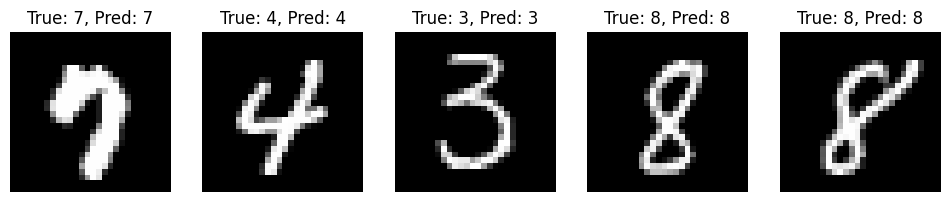

In [ ]:
# Convert test data to NumPy arrays for indexing
X_test_np = X_test.to_numpy()
y_test_np = y_test.to_numpy()

num_samples = 5
random_indices = np.random.choice(X_test_np.shape[0], num_samples, replace=False)
sample_images = X_test_np[random_indices]
sample_labels = y_test_np[random_indices]

_, sample_predictions = feedforward(sample_images, W1, b1, W2, b2)
predicted_labels = np.argmax(sample_predictions, axis=1)

# Plot
plt.figure(figsize=(12, 6))
for i in range(num_samples):
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(sample_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"True: {sample_labels[i]}, Pred: {predicted_labels[i]}")
    plt.axis('off')

plt.show()
